# What makes a TED Talk great? 

Ever since TED published its talks in 2015, TED has gained tremendous traction on the web to reach millions through its insightful content from experts in all backgrounds. But what makes a TED Talk great? In this analysis, I look at outcomes and the variables that contribute to those outcomes. 

**Outline:**
* Introduction
* What is great?
* What do great TED Talks have in common?
    * Duration
    * Speaker's Occupation
    * Themes 
* Summary
* Topics for Further Research 

## I. Introduction

**Methodology:** For this study, I accessed data hosted on Kaggle. The dataset is available through this link: https://www.kaggle.com/rounakbanik/ted-talks. The metric I use as the outcome of success is views. While comments, shares and ratings can also be used as outcomes for success, these metrics are either not clearly defined in the dataset or require advanced data science techniques to analyze. Considerations for leveraging these metrics are described in the section for topics for further research. The variables that I explore are duration, speaker's occupation and themes. 

In [1]:
# Load Python libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Gather source data set from TED. 
df = pd.read_csv('ted_main.csv')

# List out the columns to understand data.
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [2]:
# Structure data by columns in this order.
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

# Change dates to a readable format. 
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%m-%d-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%m-%d-%Y'))

## II. What is great? Most viewed. 

What is a great TED Talk? While each viewer can debate on what adjective best describes a great TED Talk, an objective measure to use as a clear indicator of success for a TED Talk is the amount of views the video has received. For the purposes of this study, we will define great by the number of **views** a TED Talk gets.   

### Which TED Talks are great? How many great TED Talks are there?

To identify which videos received that most views, I first explore the distribution of views across all of the videos. This distribution will give us insight on where the outliers lie, which will help us answer the questions above.

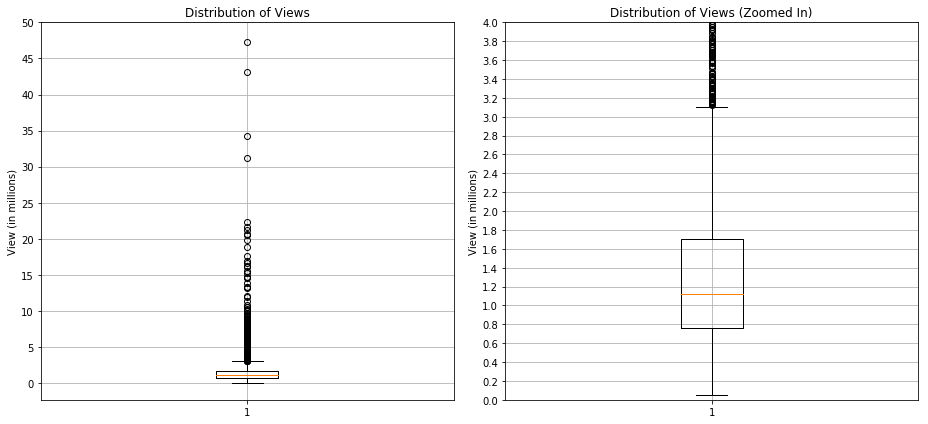

In [3]:
# Set dimensions for the chart.
plt.figure(figsize=(13, 6))

# Create boxplots for distribution of views. 
plt.subplot(1, 2, 1)
plt.boxplot((df['views']/1000000))
plt.title('Distribution of Views')
plt.ylabel('View (in millions)')
plt.yticks(np.arange(0,55,5))
plt.grid()

# Create same boxplot with zoomed in view to get a better idea of where outliers start.
plt.subplot(1, 2, 2)
plt.boxplot((df['views']/1000000))
plt.title('Distribution of Views (Zoomed In)')
plt.ylabel('View (in millions)')
plt.ylim([0,4])
plt.yticks(np.arange(0,4.1,.2))

# Print the boxplots.
plt.tight_layout()
plt.grid()
plt.show()

In [4]:
# Print the summary statistics for views.
(df['views']/1000000).describe()

count    2550.000000
mean        1.698297
std         2.498479
min         0.050443
25%         0.755793
50%         1.124524
75%         1.700759
max        47.227110
Name: views, dtype: float64

**Insight 1:** On average, a TED Talk receives *1.7 million views*.

**Insight 2:** From the zoomed in boxplot, we find outliers starting approximately at *3.1 million views*. Based on our definition of great - which is the amount of views a video gets, **we now consider TED Talks with more than 3.1 million views great**.

To find how many videos received more than 3.1 million views, we count.

In [5]:
# Set initial count to zero.
count = 0

# Loop across views to count how many videos have more than 3.1 million views. 
for view in df['views']:
    if view/1000000 > 3.1:
        count += 1

# Print total count.         
print("There are " + str(count) + " TED Talks with more than 3.1 million views.")

There are 247 TED Talks with more than 3.1 million views.


### Findings:
Videos with more than 3.1 million views are anomalies and are considered great, based on our definition. The amount of great TED Talks comes out to 247, which is about 10% of the total number of TED Talks in the dataset. 247 will be the dataset for the rest of our analysis.   

In [6]:
# Create a new pandas DataFrame for 247 TED Talk greats. 
ted_greats = df[['title', 'main_speaker','duration', 'speaker_occupation', 'views', 'tags']].sort_values('views', ascending=False).head(247)

## III. What do great TED Talks have in common?

Now that we have found the 247 TED Talks considered great, we can analyze what they have in common. Which variables affect outcomes? In this section, I explore how duration, speaker's occupation and themes contribute to outcomes. 

### Does the duration of a video affect outcomes?

The first variable I analyze is duration. I first explore the relationship between duration and views through a scatter plot, then deep dive into understanding the distribution of duration through a histogram.  

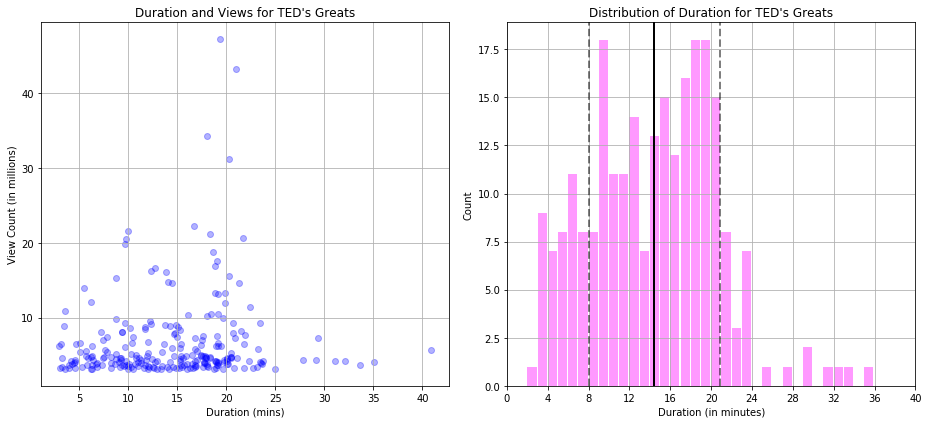

In [7]:
# Set the dimensions for the chart.
plt.figure(figsize=(13, 6))

# Create scatter plot compare duration and views for TED's greats.
plt.subplot(1, 2, 1)
plt.scatter(x=ted_greats['duration']/60, y=ted_greats['views']/1000000, color='blue', alpha=.3)
plt.title('Duration and Views for TED\'s Greats')
plt.ylabel('View Count (in millions)')
plt.xlabel('Duration (mins)')
plt.grid()

# Create histogram to understand distribution of duration. 
plt.subplot(1, 2, 2)
plt.hist(x=ted_greats['duration']/60, color='magenta', bins=np.arange(0, 40), width=.9, alpha=.4)
plt.title('Distribution of Duration for TED\'s Greats')
plt.xlim([0, 40])
plt.xticks(np.arange(0, 41, 4))
plt.ylabel('Count')
plt.xlabel('Duration (in minutes)')
plt.grid()

# Add a vertical line at the mean.
plt.axvline((ted_greats['duration']/60).mean(), color='black', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline((ted_greats['duration']/60).mean() + (ted_greats['duration']/60).std(), color='black', linestyle='dashed', linewidth=2, alpha=.5)

# Add a vertical line at one standard deviation below the mean.
plt.axvline((ted_greats['duration']/60).mean() - (ted_greats['duration']/60).std(), color='black', linestyle='dashed', linewidth=2, alpha=.5) 

# Print the scatter plots. 
plt.tight_layout()
plt.show()

In [8]:
# Find correlation coefficient value between duration and views for TED's greats.
np.corrcoef((ted_greats['duration']/60),(ted_greats['views']/1000000))

array([[ 1.        ,  0.11142377],
       [ 0.11142377,  1.        ]])

In [9]:
# Provide summary statistics for duration among TED's greats.
(ted_greats['duration']/60).describe()

count    247.000000
mean      14.452362
std        6.429043
min        2.983333
25%        9.616667
50%       14.816667
75%       18.925000
max       40.833333
Name: duration, dtype: float64

**Insight 3:** With a very weak positive correlation of .11, it is safe to say duration does not affect how many views a video receives among TED's greats. This speaks to how content is king at TED. TED is known for being a platform where you can reach a wide audience regardless of background as long as the content is substantive. This is great insight that **a TED speaker does not have to compromise quality of content for time**. 

**Insight 4:** Despite duration not being significantly important, there are some guidelines for TED speakers looking for a ballpark target range. The average duration among TED's greats is 14.5 minutes, and **68% of TED's greats fall within 8 to 21 minutes**. 

### Does the occupation of the speaker matter?

The second variable I analyze is the occupation of the speaker. To examine which occupation appears the most among TED's greats, I leverage a bar graph. I first organize the DataFrame into a format with only the speaker's occupation and appearances. Then, I create a bar graph to display the occupations that make the most appearances. 

In [10]:
# Create new DataFrame to organize into occupations and appearances.
occupation_ted_greats = ted_greats.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'main_speaker']]
occupation_ted_greats.columns = ['occupation', 'appearances']
occupation_ted_greats = occupation_ted_greats.sort_values('appearances', ascending=False)

# List the 6 occupations with most appearances. 
occupation_ted_greats.head(6)

,occupation,appearances
169,Writer,16
138,Psychologist,8
57,Entrepreneur,6
84,Leadership expert,4
140,Psychologist; happiness expert,3
152,Social psychologist,3


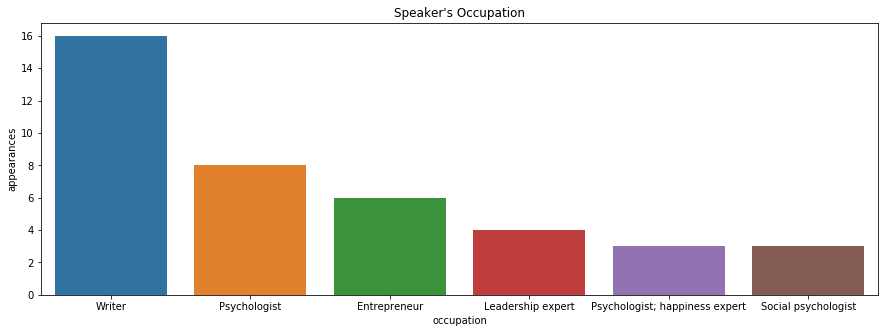

In [11]:
# Create bar graph to show which occupations appear the most.
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_ted_greats.head(6))
plt.title('Speaker\'s Occupation')
plt.show()

**Insight 5:** Writers, psychologists, entrepreneurs and leadership experts make the most appearances on TED's greats. This insight suggests occupations with broad nature have had the best chances at becoming one of TED's greats. While it is not significant - as the top 6 occupations only represent 16% of TED's greats - these broad vocations made more appearances overall compared to niche occupations (i.e. Software Architect, Theoretical Physicist, Yo-yo Champion - each made an appearance). 

### Are there common themes amongst TED's greats?

The last variable I analyze are themes. For each video, there are a few tags associated with it. To figure out which themes come up most amongst TED's greats, I aggregate a list of all of the tags mentioned across the 247 videos then count which tags are used most. 

In [17]:
# Import Python libraries.
import ast
ted_greats['tags'] = ted_greats['tags'].apply(lambda x: ast.literal_eval(x))

In [18]:
# Rename tags to theme. 
s = ted_greats.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

In [41]:
# Restructure dataset to separate each tag to be able to count themes.
theme_ted_greats = ted_greats.drop('tags', axis=1).join(s)
theme_ted_greats.head()

,title,main_speaker,duration,speaker_occupation,views,theme
0,Do schools kill creativity?,Ken Robinson,1164,Author/educator,47227110,children
0,Do schools kill creativity?,Ken Robinson,1164,Author/educator,47227110,creativity
0,Do schools kill creativity?,Ken Robinson,1164,Author/educator,47227110,culture
0,Do schools kill creativity?,Ken Robinson,1164,Author/educator,47227110,dance
0,Do schools kill creativity?,Ken Robinson,1164,Author/educator,47227110,education


In [21]:
# Count how many distint themes are out there.
len(theme_ted_greats['theme'].value_counts())

274

In [22]:
# Create new DataFrame to include just the themes and the number of talks associated with it. 
pop_themes = pd.DataFrame(theme_ted_greats['theme'].value_counts()).reset_index()
pop_themes.columns = ['theme', 'talks']
pop_themes.head(10)

,theme,talks
0,culture,82
1,technology,51
2,business,47
3,science,44
4,entertainment,44
5,psychology,40
6,TEDx,38
7,brain,30
8,global issues,28
9,work,24


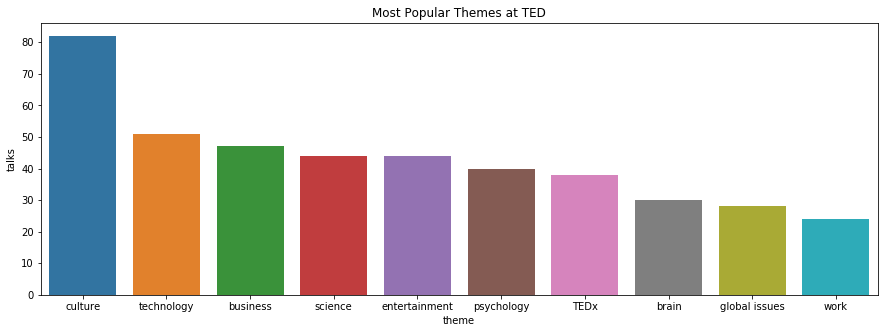

In [32]:
# Creat bargraph with the top 10 most popular themes.
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=pop_themes.head(10))
plt.title('Most Popular Themes at TED')
plt.show()

**Insight 6:** **Culture, technology and business are the most popular** themes among TED's greats. TED is a great platform for discussing society's most pressing issues, so it makes sense that culture is a topic that resonates with the TED audience. Consistent with its Silicon Valley origins, it is no surprise that TED's popular themes include technology and business.

### Findings: 
After analyzing the relationship between a number of variables and outcomes, here are our findings: 
* **Duration**: Duration has a weak positive correlation with views (r=.11). But the sweet spot is between 8 to 21 minutes long. 
* **Speaker's Occupation**: Writers, Psychologists, Entrepreneurs and Leadership Experts appear most in TED's greats.
* **Themes**: Culture, technology and business come up most among TED's greats.

## Summary 
After conducting this study, we found varying degrees of connection between variables and outcomes. This variability probably speaks to the importance of substantial content in TED talk videos and the opportunity the platform brings to connect with a wide-ranging audience regardless of background. 

We did find some great insights on TED's greats. The 247 videos, which attracted more than 3.1 million views each are anomalies and are considered great by our definition. And while we did not find strong correlations with the duration, aspiring TED speakers could take away a few guiding posts: keep the talk between 8 to 21 minutes, share boldly if you are coming from a broad background and focus on the topics of culture, technology and business to relate with the TED audience around the world. 

### Topics for Further Research
The study can be extended into deeper analytics by leveraging the following advanced data science techniques:
* **Network Analytics:** How does being related to the top 247 videos increase a TED Talks chances of becoming great? By studying how related videos create networks, we could find out how it affects outcomes, such as shares, ratings and views.
* **Natural Language Processing and Sentiment Analysis**: How can we predict which videos will become great in the future using descriptions? One area I would like to explore is creating a model to read through the description for each video and associating sentiments to common terms that come up. Through this model, we would potentiall predict how viewers will feel about the content presented and measure how those sentiments in comparison to the sentiments present in the top 247 today.  